<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

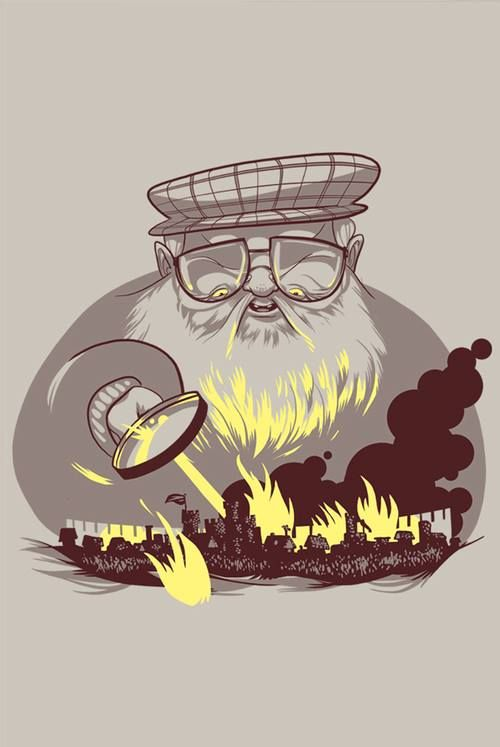

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 71.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 8.58MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
# ...
import pandas as pd  # Для работы с данными
import matplotlib.pyplot as plt  # Для создания графиков
import seaborn as sns # Для визуализации данных
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
# Загружаем датасет из CSV-файла
# Указываем параметр index_col, чтобы использовать столбец 'S.No' в качестве индекса строк
train = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')
print(train.shape)
pd.set_option('display.max_columns', None)
train.head()

(1557, 25)


,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [ ]:
test = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')
print(test.shape)
test.head()

(389, 24)


,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,0,0,0,0,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,0,0,1,1,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,1,1,1,1,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783


In [ ]:
y = train['isAlive']
train.drop('isAlive', axis=1, inplace=True)

In [ ]:
data = pd.concat([train, test])
data.shape

(1946, 24)

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
# ...
# Проверяем наличие NaN
print("\nКоличество NaN в каждой колонке:")
print(data.isnull().sum())


Количество NaN в каждой колонке:
name                   0
title               1008
male                   0
culture             1269
dateOfBirth         1513
mother              1925
father              1920
heir                1923
house                427
spouse              1670
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1925
isAliveFather       1920
isAliveHeir         1923
isAliveSpouse       1670
isMarried              0
isNoble                0
age                 1513
numDeadRelations       0
popularity             0
dtype: int64


In [ ]:
# Заполняем пропущенные значения
# Вычисляем среднее и медиану для 'age' и 'dateOfBirth'
mean_Age = data['age'].mean()  # Среднее значение для 'age'
median_Age = data['age'].median()  # Медиана для 'age'
mean_dateOfBirth = data['dateOfBirth'].mean()  # Среднее значение для 'dateOfBirth'
median_dateOfBirth = data['dateOfBirth'].median()  # Медиана для 'dateOfBirth'

# Выводим результаты
print(f"\nСреднее для Age = {mean_Age}")
print(f"Медиана для Age = {median_Age}")
print(f"Среднее для dateOfBirth = {mean_dateOfBirth}")
print(f"Медиана для dateOfBirth = {median_dateOfBirth}")


Среднее для Age = -1293.5635103926097
Медиана для Age = 27.0
Среднее для dateOfBirth = 1577.364896073903
Медиана для dateOfBirth = 268.0


In [ ]:
data.sample(5)

,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,,,
1106,Ser,1,nan,NaN,NaN,NaN,NaN,House Beesbury,NaN,0,0,0,0,0,0.714286,0.192308,0.652174,0.778986,0,1,NaN,0,0
1115,First Ranger,1,nan,NaN,NaN,NaN,NaN,Night's Watch,NaN,1,1,1,0,1,0.714286,0.192308,0.652174,0.778986,0,1,NaN,0,0
1787,Ser,1,nan,NaN,NaN,NaN,NaN,House Rhysling,NaN,0,0,0,0,0,0.714286,0.192308,0.652174,0.778986,0,1,NaN,0,0
233,NaN,1,ironborn,268.0,NaN,NaN,NaN,House Greyjoy,NaN,0,0,0,1,0,0.714286,0.192308,0.652174,0.778986,0,0,37.0,0,0
1333,Ser,1,nan,NaN,NaN,NaN,NaN,House Vance of Atranta,NaN,0,0,1,1,0,0.714286,0.192308,0.652174,0.778986,0,1,NaN,0,0


In [ ]:
# Функция для обработки DataFrame
def process_df(df):
    """
    Обрабатывает DataFrame:
    1. Заменяет пропуски в столбце 'age' на медиану.
    2. Заменяет пропуски в столбце 'dateOfBirth' на медиану.
    3. Удаляет выбросы в столбце 'age' (значения меньше 0 или больше 120).
    4. Возвращает обработанный DataFrame.
    """
    # Копируем DataFrame, чтобы не изменять исходный
    data = df.copy()

    # Заменяем пропуски в столбце 'age' на медиану
    data['age'] = data['age'].fillna(data['age'].median())

    # Заменяем пропуски в столбце 'dateOfBirth' на медиану
    data['dateOfBirth'] = data['dateOfBirth'].fillna(data['dateOfBirth'].median())

    # Удаляем выбросы в столбце 'age'
    data = data[(data['age'] > 0) & (data['age'] < 120)]

    return data

In [ ]:
# Применяем функцию process_df к данным
processed_data = process_df(data)

In [ ]:
data.sample(5)

,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,,,
1705,Ser,1,nan,277.0,NaN,NaN,NaN,House Tyrell of Brightwater Keep,Leonette Fossoway,1,1,1,1,1,0.714286,0.192308,0.652174,1.000000,1,1,28.0,0,0
1196,Ser,1,nan,249.0,NaN,NaN,NaN,House Frey,Bellena Hawick,1,1,1,1,1,0.714286,0.192308,0.652174,1.000000,1,1,56.0,0,0
980,NaN,1,nan,NaN,NaN,NaN,NaN,Night's Watch,NaN,1,1,1,1,1,0.714286,0.192308,0.652174,0.778986,0,0,NaN,0,0
267,NaN,0,ironborn,NaN,NaN,NaN,NaN,House Greyjoy,NaN,0,1,0,0,0,0.714286,0.192308,0.652174,0.778986,0,0,NaN,0,0
318,Ser,1,nan,NaN,NaN,NaN,NaN,House Charlton,NaN,0,1,0,0,0,0.714286,0.192308,0.652174,0.778986,0,1,NaN,0,0


In [ ]:
# Проверяем процент пропущенных значений в столбце 'isAliveMother'
na_percentage = round((data['isAliveMother'].isna().sum() / len(data['isAliveMother'])) * 100, 3)
print(f"\n{na_percentage}% пропущенных данных у признака isAliveMother")

# Вычисляем среднее и медиану для 'isAliveMother'
mean_isAliveMother = data['isAliveMother'].mean()  # Среднее значение для 'isAliveMother'
median_isAliveMother = data['isAliveMother'].median()  # Медиана для 'isAliveMother'

# Выводим результаты
print(f"Среднее для isAliveMother = {mean_isAliveMother}")
print(f"Медиана для isAliveMother = {median_isAliveMother}")


98.921% пропущенных данных у признака isAliveMother
Среднее для isAliveMother = 0.7142857142857143
Медиана для isAliveMother = 1.0


In [ ]:
# Обработка NaN
# Заполнение NaN медианой для числовых колонок и модой для категориальных
# Список признаков, для которых нужно заполнить пропущенные значения
features_to_fill = ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']

# Вычисляем среднее значение для каждого столбца
mean_values = data[features_to_fill].mean()

# Заполняем пропущенные значения средним значением
data[features_to_fill] = data[features_to_fill].fillna(mean_values)

# Выводим результат
print("\nDataFrame после замены значений:")
print(data[features_to_fill].head())


DataFrame после замены значений:
      isAliveMother  isAliveFather  isAliveHeir  isAliveSpouse
S.No                                                          
1          1.000000       0.000000     0.000000       0.778986
2          0.714286       0.192308     0.652174       1.000000
3          0.714286       0.192308     0.652174       0.778986
4          0.714286       0.192308     0.652174       0.000000
5          0.714286       0.192308     0.652174       1.000000


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
# Создаем признак isPopular
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)

# Создаем признак boolDeadRelations
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# Словарь культур
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari', 'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

# Создаем функцию для поиска соответствующего ключа
data["culture"] = data["culture"].astype(str).apply(lambda x: x.lower() if not x.startswith('nan') else x)

data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,nan,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.000000,0.000000,0.000000,0.778986,0,0,NaN,11,0.605351,1,1
2,Walder Frey,Lord of the Crossing,1,rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,0.714286,0.192308,0.652174,1.000000,1,1,97.0,1,0.896321,1,1
3,Addison Hill,Ser,1,nan,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,0.714286,0.192308,0.652174,0.778986,0,1,NaN,0,0.267559,0,0
4,Aemma Arryn,Queen,0,nan,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,0.714286,0.192308,0.652174,0.000000,1,1,23.0,0,0.183946,0,0
5,Sylva Santagar,Greenstone,0,dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,0.714286,0.192308,0.652174,1.000000,1,1,29.0,0,0.043478,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,westeros,NaN,NaN,NaN,NaN,House Stark,NaN,1,1,1,1,1,0.714286,0.192308,0.652174,0.778986,0,0,NaN,0,0.351171,0,0
1943,Reek,NaN,1,nan,NaN,NaN,NaN,NaN,House Bolton,NaN,0,1,0,1,1,0.714286,0.192308,0.652174,0.778986,0,0,NaN,0,0.096990,0,0
1944,Symeon Star-Eyes,NaN,1,nan,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,0.714286,0.192308,0.652174,0.778986,0,0,NaN,0,0.030100,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
# Удаляем ненужные столбцы
data.drop(columns=['name', 'numDeadRelations', 'popularity'], inplace=True)

In [ ]:
data.sample(5)

,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,,,
242,NaN,0,nan,294.0,NaN,NaN,NaN,House Frey,NaN,0,1,1,1,0,0.714286,0.192308,0.652174,0.778986,0,0,11.0,0,0
1737,Magister,1,pentoshi,NaN,NaN,NaN,NaN,House Targaryen,Cousin to the Prince of Pentos,1,1,1,1,1,0.714286,0.192308,0.652174,1.000000,1,1,NaN,0,0
1350,NaN,0,nan,287.0,NaN,NaN,NaN,House Frey,NaN,0,1,1,1,0,0.714286,0.192308,0.652174,0.778986,0,0,18.0,0,0
1184,Lord of Darry,0,nan,290.0,NaN,NaN,NaN,House Darry,NaN,1,1,0,0,0,0.714286,0.192308,0.652174,0.778986,0,1,9.0,0,0
163,NaN,0,braavosi,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0.714286,0.192308,0.652174,0.778986,0,0,NaN,0,0


In [ ]:
# Проверяем наличие NaN
print("\nКоличество NaN в каждой колонке:")
print(data.isnull().sum())


Количество NaN в каждой колонке:
title                1008
male                    0
culture                 0
dateOfBirth          1513
mother               1925
father               1920
heir                 1923
house                 427
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother           0
isAliveFather           0
isAliveHeir             0
isAliveSpouse           0
isMarried               0
isNoble                 0
age                  1513
isPopular               0
boolDeadRelations       0
dtype: int64


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

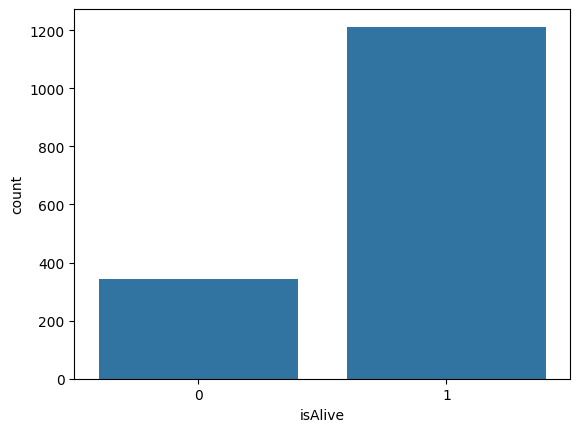

In [ ]:
sns.countplot(pd.DataFrame(y), x='isAlive');
# у нас несбалансированная категориальная целевая переменная

In [ ]:
# Визуализация распределения целевой переменной
plt.figure(figsize=(10, 5))
data['x'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('x')
plt.suptitle('Distribution of isAlive')
plt.show()

KeyError: 'x'

<Figure size 1000x500 with 0 Axes>

In [ ]:
data['title'].value_counts()

,count
title,
Ser,384
Maester,39
Archmaester,21
Lord,20
Septon,18
...,...
Greenshield,1
Mistress of whisperers,1
Shatterstone,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1946 entries, 1 to 1946
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              938 non-null    object 
 1   male               1946 non-null   int64  
 2   culture            1946 non-null   object 
 3   dateOfBirth        433 non-null    float64
 4   mother             21 non-null     object 
 5   father             26 non-null     object 
 6   heir               23 non-null     object 
 7   house              1519 non-null   object 
 8   spouse             276 non-null    object 
 9   book1              1946 non-null   int64  
 10  book2              1946 non-null   int64  
 11  book3              1946 non-null   int64  
 12  book4              1946 non-null   int64  
 13  book5              1946 non-null   int64  
 14  isAliveMother      1946 non-null   float64
 15  isAliveFather      1946 non-null   float64
 16  isAliveHeir        1946 non-n

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
data.columns

Index(['title', 'male', 'culture', 'dateOfBirth', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'isAlive', 'isPopular',
       'boolDeadRelations'],
      dtype='object')

In [ ]:

# Список категориальных признаков
categorical_features = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
            'book4', 'book5', 'isMarried', 'isNoble', 'isPopular', 'boolDeadRelations',
            'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse']

# Выделим категориальные признаки
categorical_columns = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
            'book4', 'book5', 'isMarried', 'isNoble','isPopular', 'boolDeadRelations',
            'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse']
categorical_features = data[categorical_columns]

# Из них выделим нечисловые признаки
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()

# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем нечисловые категориальные признаки в числа
for feature in unprocessed_cat_features:
    data[feature] = label_encoder.fit_transform(df[feature])

# Масштабирование числовых признаков
numeric_cols = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
            'book4', 'book5', 'isMarried', 'isNoble', 'isPopular', 'boolDeadRelations',
            'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse']
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Выводим результат
print("DataFrame после преобразования категориальных признаков:")
print(data.head())

encoder = LabelEncoder()
for category in categorical_columns:
  data[category] = encoder.fit_transform(data[category])

DataFrame после преобразования категориальных признаков:
         title      male   culture  dateOfBirth    mother    father      heir  \
S.No                                                                            
1558  0.745858 -1.655411 -0.036067   156.000000  0.081574  0.092968  0.068182   
1559  0.745858 -1.655411 -2.374413  3986.571429  0.081574  0.092968  0.068182   
1560  0.745858 -1.655411 -0.036067  3986.571429  0.081574  0.092968  0.068182   
1561  0.265496  0.604080 -0.036067  3986.571429  0.081574  0.092968  0.068182   
1562  0.745858  0.604080  1.026817   262.000000  0.081574  0.092968  0.068182   

         house    spouse     book1     book2     book3     book4     book5  \
S.No                                                                         
1558 -1.245882  0.413699 -0.881054 -1.135005 -1.444750 -1.562843  0.724907   
1559  1.239012  0.413699 -0.881054  0.881054  0.692161  0.639860  0.724907   
1560 -1.620961  0.413699 -0.881054 -1.135005  0.692161  0.63986

In [ ]:
import pickle
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
#проанализируем признаки
numerical_columns = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
            'book4', 'book5', 'isMarried', 'isNoble', 'isPopular', 'boolDeadRelations',
            'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse']
num_features = data[numerical_columns]

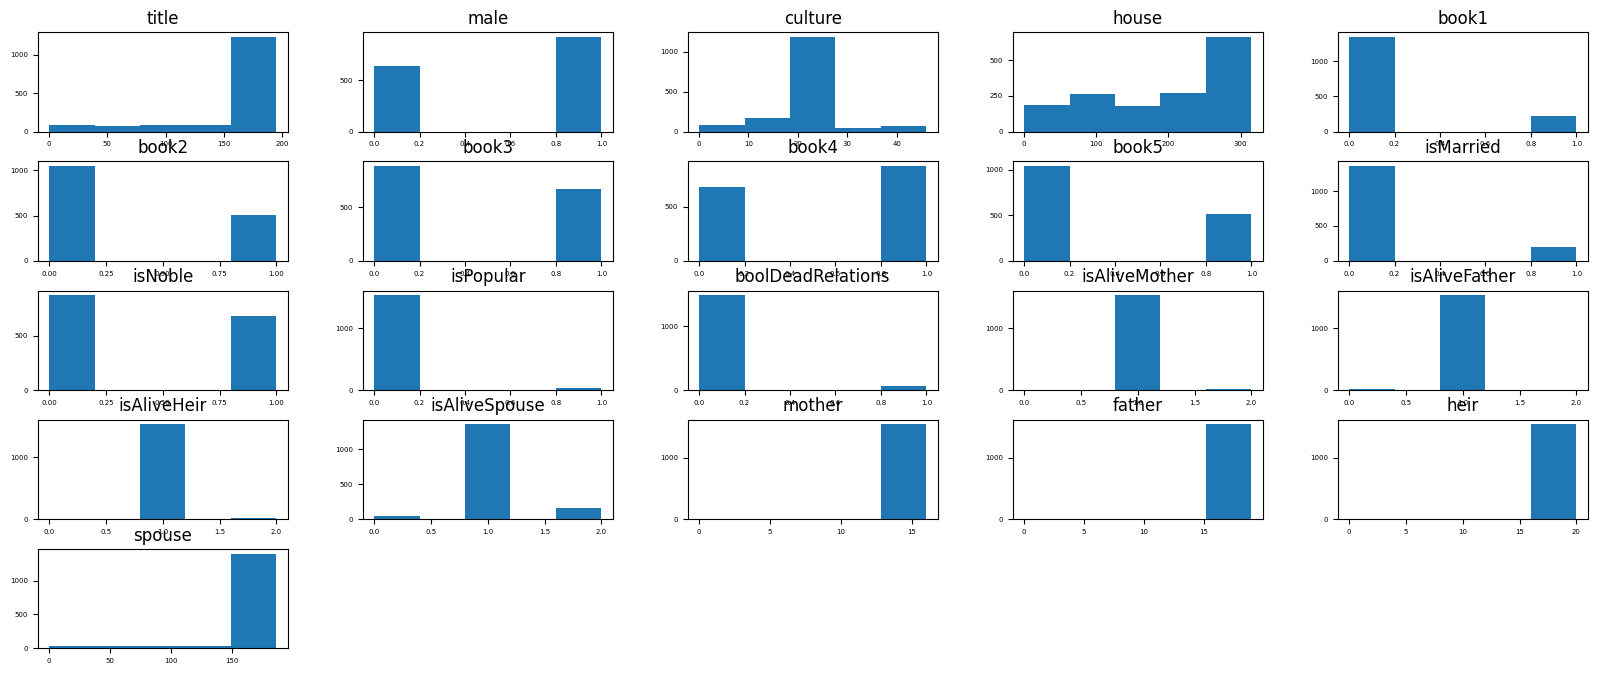

In [ ]:
num_features.hist(figsize=(20, 8), bins=5,xlabelsize=5, ylabelsize=5, grid=False);

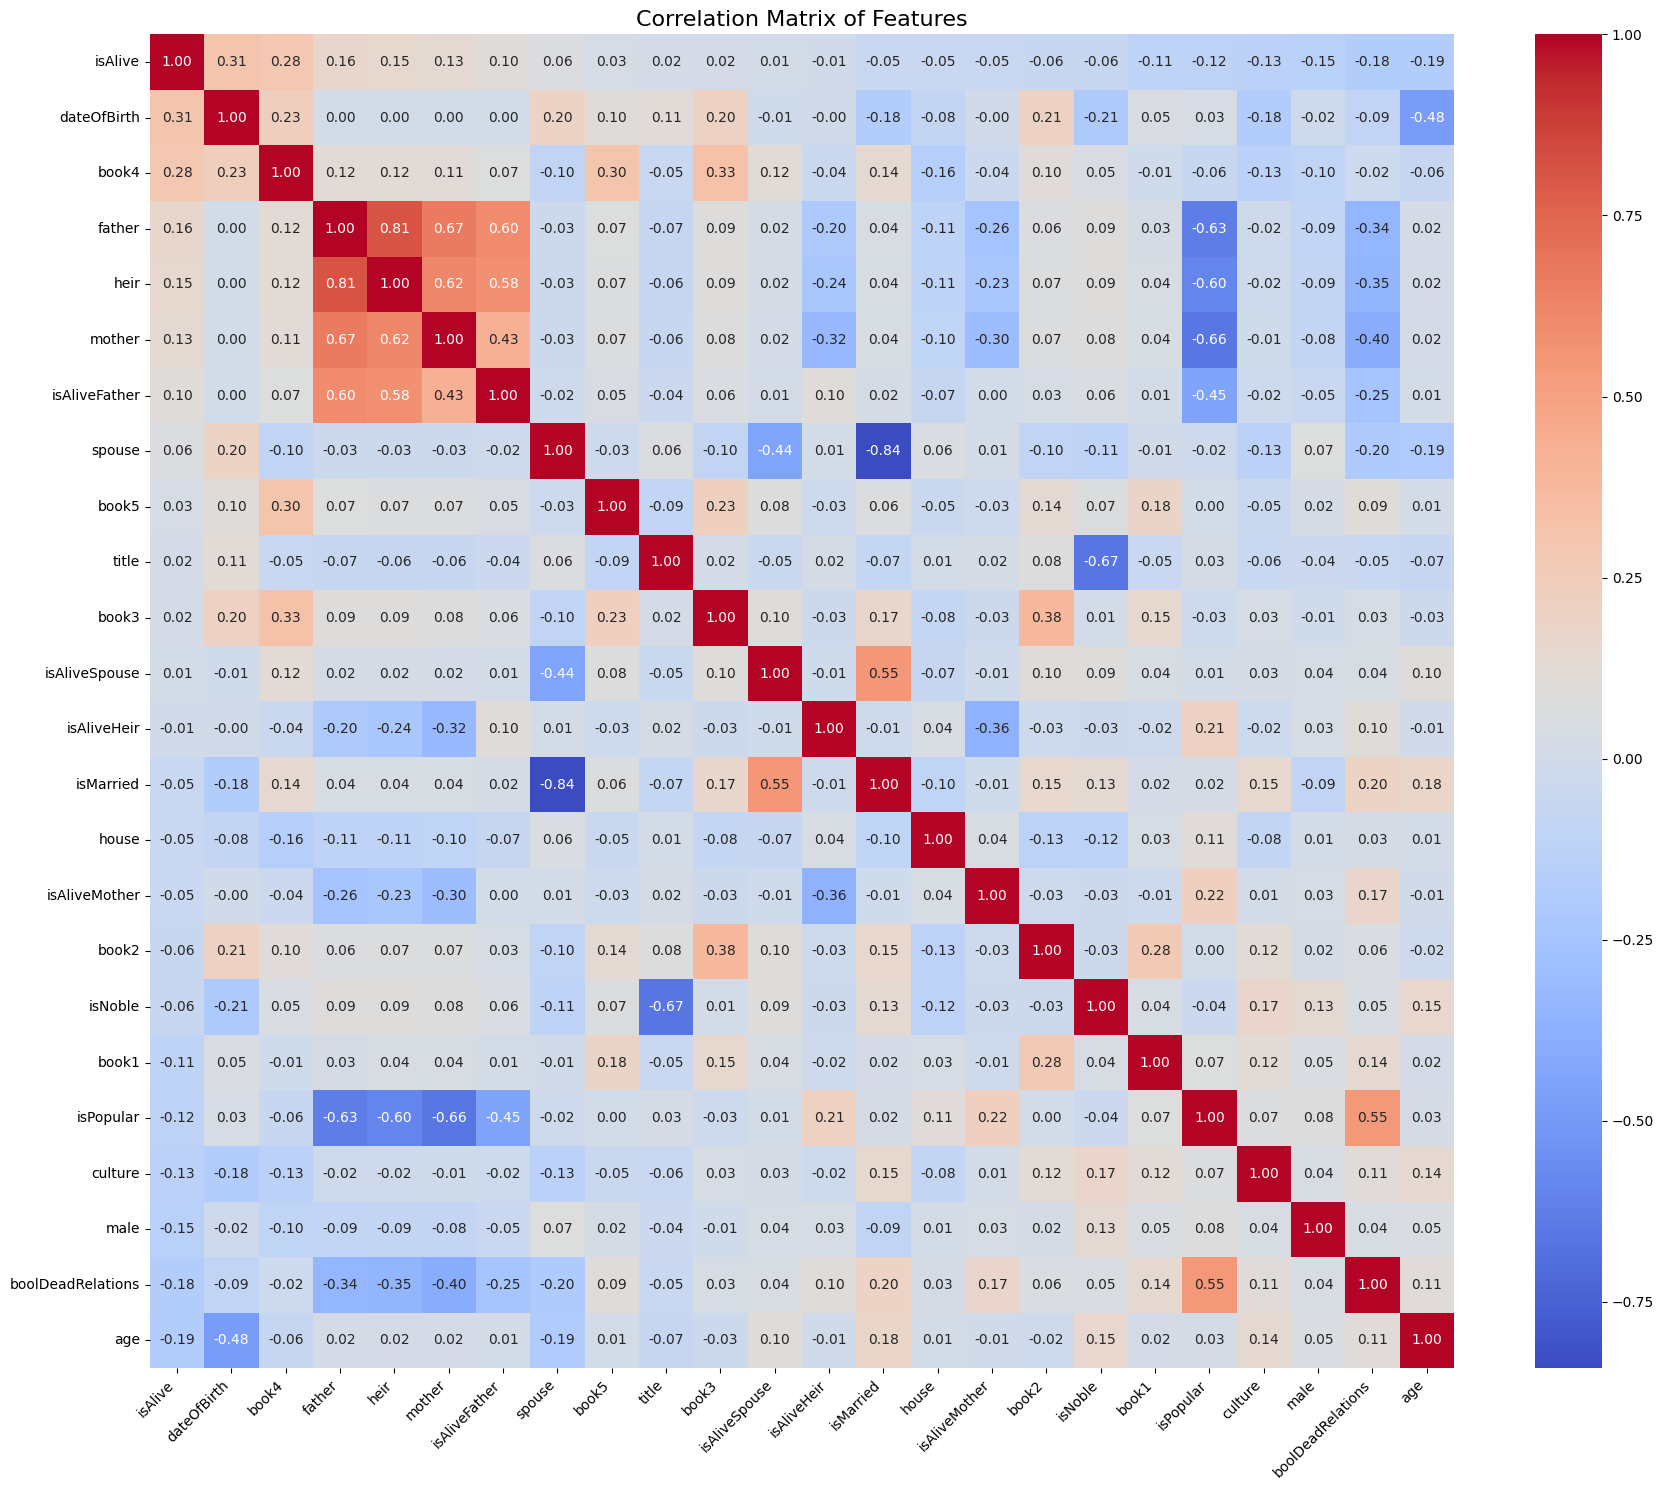

In [ ]:
# Выводим корреляционную матрицу
corrmat = data.corr()

# Список признаков для визуализации
numeric_cols = data.select_dtypes(include=[np.number]).columns  # Выбираем только числовые столбцы

# Визуализация корреляционной матрицы
cols = corrmat.nlargest(len(numeric_cols), 'isAlive')['isAlive'].index  # Выбираем признаки с наибольшей корреляцией с 'isAlive'
cm = corrmat.loc[cols, cols]  # Используем корреляционную матрицу из corrmat

# Увеличиваем размер фигуры
plt.figure(figsize=(18, 15))

# Создаем тепловую карту
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f',
            yticklabels=cols.values, xticklabels=cols.values)

# Настройка отображения
plt.title('Correlation Matrix of Features', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Поворачиваем метки по оси X для удобства чтения
plt.yticks(rotation=0)  # Оставляем метки по оси Y без поворота
plt.tight_layout()  # Автоматически подстраивает размеры для вмещения всех элементов
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
# 1. Парные графики для выбранных признаков
selected_features = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
                     'book4', 'book5', 'isMarried', 'isNoble', 'isPopular', 'boolDeadRelations',
                     'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse']
sns.pairplot(df[selected_features + ['isAlive']], hue='isAlive')
plt.suptitle('Pairplot of Selected Features', y=1.02)  # Добавляем заголовок
plt.show()

# 2. Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='title', y='culture', hue='isAlive')
plt.title('Scatter Plot: Title vs Culture')
plt.show()

# 3. Распределение признака 'title'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='title', bins=50)
plt.title('Distribution of Title')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
            'book4', 'book5', 'isMarried', 'isNoble','isPopular', 'boolDeadRelations',
            'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse']
y = ['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
# Создаем X (признаки) и y (целевая переменная)
X = data[['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
            'book4', 'book5', 'isMarried', 'isNoble','isPopular', 'boolDeadRelations',
            'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse']].values
y = data['isAlive'].values

# Выводим размеры X и y
print("Размер X:", X.shape)
print("Размер y:", y.shape)

Размер X: (1555, 21)
Размер y: (1555,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [2]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor

SyntaxError: invalid syntax (<ipython-input-2-e57a653e8ed6>, line 1)

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Инициализация модели логистической регрессии
model_name = "Logistic Regression"
logistic_regression = LogisticRegression()

# Обучение модели на масштабированных данных
logistic_regression.fit(X_train_scaled, y_train)
y_pred = logistic_regression.predict(X_test_scaled)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)

print(f'{model_name} Accuracy: {accuracy:.2f}')

Logistic Regression Accuracy: 0.78


In [ ]:
# Шаг 1. создание модели
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
gaussian_process = GaussianProcessClassifier()
gaussian_nb = GaussianNB()
k_neighbors = KNeighborsClassifier()
svc = SVC()
decision_tree = DecisionTreeClassifier()

# Шаг 2. обучение модели
ada.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)
gaussian_process.fit(X_train_scaled, y_train)
gaussian_nb.fit(X_train_scaled, y_train)
k_neighbors.fit(X_train_scaled, y_train)
svc.fit(X_train_scaled, y_train)
decision_tree.fit(X_train_scaled, y_train)
# Шаг 3. Предсказание на тестовых данных
y_pred_ada = ada.predict(X_test_scaled)
y_pred_random_forest = random_forest.predict(X_test_scaled)
y_pred_gaussian_process = gaussian_process.predict(X_test_scaled)
y_pred_gaussian_nb = gaussian_nb.predict(X_test_scaled)
y_pred_k_neighbors = k_neighbors.predict(X_test_scaled)
y_pred_svc = svc.predict(X_test_scaled)
y_pred_decision_tree = decision_tree.predict(X_test_scaled)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Словарь для хранения моделей
models = {
    'Logistic Regression': LogisticRegression(n_jobs=-1),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian Process': GaussianProcessClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
}

# Обучение моделей и предсказание на тестовой выборке
for model_name, model in models.items():
    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовых данных
    y_pred = model.predict(X_test)

    # Оценка точности
    accuracy = accuracy_score(y_test, y_pred)

    print(f'{model_name} Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 0.7781
Random Forest Accuracy: 0.7749
AdaBoost Accuracy: 0.7910
Gaussian Process Accuracy: 0.7235
GaussianNB Accuracy: 0.7781
KNeighbors Accuracy: 0.7556
Support Vector Classifier Accuracy: 0.7685
Decision Tree Accuracy: 0.7138


Выберите лучшую модель.

### Файл `submission.csv`

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 6.17MB/s]


In [ ]:
data = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
data["culture"] = df["culture"].astype(str).apply(lambda x: x.lower() if not x.startswith('nan') else x)
data.drop(columns=['name', 'numDeadRelations', 'popularity'], inplace = True)
categorical_columns = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
            'book4', 'book5', 'isMarried', 'isNoble','isPopular', 'boolDeadRelations',
            'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse']
# Из них выделим нечисловые признаки
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()

# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем нечисловые категориальные признаки в числа
for feature in unprocessed_cat_features:
    data[feature] = label_encoder.fit_transform(df[feature])

# Масштабирование числовых признаков
numeric_cols = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
            'book4', 'book5', 'isMarried', 'isNoble','isPopular', 'boolDeadRelations',
            'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse']
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

encoder = LabelEncoder()
for category in categorical_columns:
  data[category] = encoder.fit_transform(data[category])

# Заполнение пропусков средними значениями в остальных признаках
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
  data[col] = data[col].fillna(data[col].mean())

# Выводим результат
print("DataFrame после преобразования категориальных признаков:")
print(data.head())


DataFrame после преобразования категориальных признаков:
      title  male  culture  dateOfBirth  mother  father  heir  house  spouse  \
S.No                                                                           
1558    109     0       22   156.000000       3       4     2     22      75   
1559    109     0        0  3986.571429       3       4     2    128      75   
1560    109     0       22  3986.571429       3       4     2      6      75   
1561     94     1       22  3986.571429       3       4     2    106      75   
1562    109     1       32   262.000000       3       4     2     50      42   

      book1  book2  book3  book4  book5  isAliveMother  isAliveFather  \
S.No                                                                    
1558      0      0      0      0      1              1              1   
1559      0      1      1      1      1              1              1   
1560      0      0      1      1      0              1              1   
1561      1      

In [ ]:
import pickle
encoder = 'encoder.pkl'
with open(encoder, 'rb') as f:
    encoder = pickle.load(f)
for category in categorical_columns:
  data[category] = encoder.fit_transform(data[category])


In [ ]:
# Словарь для хранения моделей
models = {
    'Logistic Regression': LogisticRegression(n_jobs=-1),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian Process': GaussianProcessClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
}

# Обучение и оценка моделей
for model_name, model in models.items():
    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовых данных
    y_pred = model.predict(X_test)  # Исправлено: передаем X_test, а не y_test

    # Оценка точности
    accuracy = accuracy_score(y_test, y_pred)

    print(f'{model_name} Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 0.7781
Random Forest Accuracy: 0.7653
AdaBoost Accuracy: 0.7910
Gaussian Process Accuracy: 0.7235
GaussianNB Accuracy: 0.7781
KNeighbors Accuracy: 0.7556
Support Vector Classifier Accuracy: 0.7685
Decision Tree Accuracy: 0.7106


In [ ]:
"""# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Инициализация модели
model_name = "Logistic Regression"
logistic_regression = LogisticRegression()

# Обучение модели
logistic_regression.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test_scaled)"""

'# Масштабирование данных\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n\n# Инициализация модели\nmodel_name = "Logistic Regression"\nlogistic_regression = LogisticRegression()\n\n# Обучение модели\nlogistic_regression.fit(X_train_scaled, y_train)\n\n# Предсказание на тестовых данных\ny_pred = logistic_regression.predict(X_test_scaled)'

In [ ]:
print(X_train.shape)  # (количество строк, 21 признак)
print(X_test.shape)   # (количество строк, 21 признак)

(1244, 21)
(311, 21)


In [ ]:
y_pred_df = logistic_regression.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: X has 24 features, but LogisticRegression is expecting 21 features as input.

In [ ]:
y_pred_df = pd.DataFrame(y_pred, columns=['isAlive'])
y_pred_df.to_csv("/content/new_submission.csv", index=False)

In [ ]:
y_pred = random_forest.predict(data)
y_pred_df = pd.DataFrame(y_pred, columns=['isAlive'])
y_pred_df.to_csv("/content/new_submission_random_forest.csv", index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 24 features, but RandomForestClassifier is expecting 21 features as input.

In [ ]:
y_pred = gaussian_process.predict(data)
y_pred_df = pd.DataFrame(y_pred, columns=['isAlive'])
y_pred_df.to_csv("/content/new_submission_gaussian_process.csv", index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianProcessClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 24 features, but GaussianProcessClassifier is expecting 21 features as input.

In [ ]:
y_pred = k_neighbors.predict(data)
y_pred_df = pd.DataFrame(y_pred, columns=['isAlive'])
y_pred_df.to_csv("/content/new_submission_k_neighbors.csv", index=False)

In [ ]:
y_pred = svc.predict(data)
y_pred_df = pd.DataFrame(y_pred, columns=['isAlive'])
y_pred_df.to_csv("/content/new_submission_svc.csv", index=False)

In [ ]:
y_pred = decision_tree.predict(data)
y_pred_df = pd.DataFrame(y_pred, columns=['isAlive'])
y_pred_df.to_csv("/content/new_submission_decision_tree.csv", index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 24 features, but DecisionTreeClassifier is expecting 21 features as input.

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
!pip install catboost

In [ ]:
print(data.columns)

Index(['title', 'male', 'culture', 'dateOfBirth', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'isAlive'],
      dtype='object')


              male  dateOfBirth        book1        book2        book3  \
count  1557.000000   279.000000  1557.000000  1557.000000  1557.000000   
mean      0.590880   247.551971     0.138728     0.327553     0.431599   
std       0.491829    61.550441     0.345774     0.469472     0.495458   
min       0.000000   -25.000000     0.000000     0.000000     0.000000   
25%       0.000000   241.000000     0.000000     0.000000     0.000000   
50%       1.000000   272.000000     0.000000     0.000000     0.000000   
75%       1.000000   286.000000     0.000000     1.000000     1.000000   
max       1.000000   299.000000     1.000000     1.000000     1.000000   

             book4        book5  isAliveMother  isAliveFather  isAliveHeir  \
count  1557.000000  1557.000000      18.000000      22.000000    21.000000   
mean      0.562620     0.330122       0.666667       0.227273     0.666667   
std       0.496223     0.470408       0.485071       0.428932     0.483046   
min       0.000000   

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Accuracy: 0.8577
              Feature  Importance
12              book4   13.171721
3         dateOfBirth   11.243043
7               house   10.767570
1                male    9.923806
2             culture    8.316500
11              book3    7.888413
10              book2    7.298259
0               title    7.238156
13              book5    6.399586
19            isNoble    5.531442
20                age    3.345887
9               book1    2.742540
8              spouse    1.296864
22  boolDeadRelations    1.249738
18          isMarried    1.144065
17      isAliveSpouse    0.962048
5              father    0.554741
21          isPopular    0.324449
6                heir    0.212269
15      isAliveFather    0.170841
16        isAliveHeir    0.147393
4              mother    0.052765
14      isAliveMother    0.017904


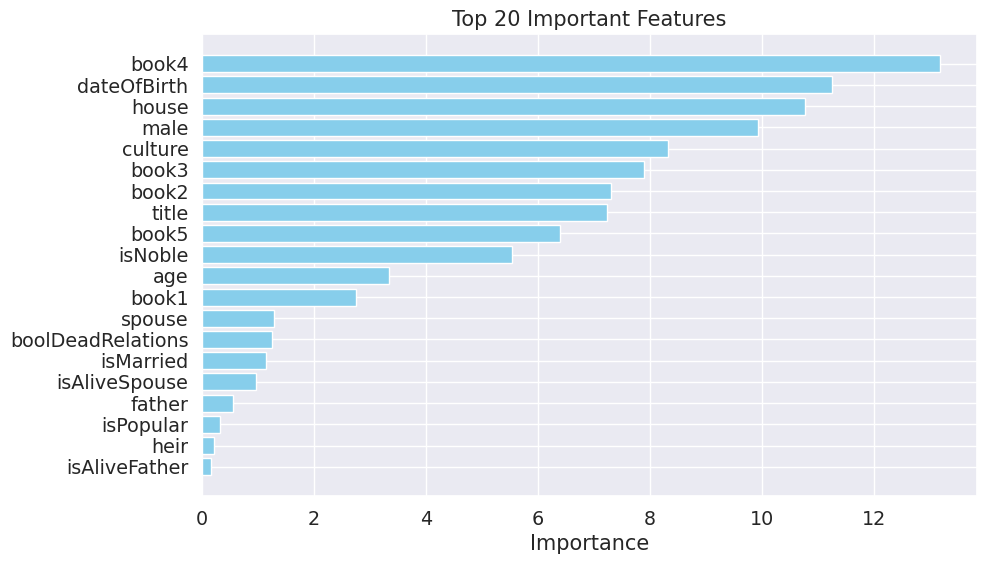

DataFrame после преобразования категориальных признаков:
         title      male   culture  dateOfBirth    mother    father  \
S.No                                                                  
1     0.630132  0.832101  0.094070   247.551971 -4.827108 -7.906025   
2    -0.943797  0.832101  1.448846   208.000000  0.095480  0.104771   
3     0.012514  0.832101  0.094070   247.551971  0.095480  0.104771   
4    -0.346102 -1.201778  0.094070    82.000000  0.095480  0.104771   
5    -2.179032 -1.201778 -2.163890   276.000000  0.095480  0.104771   

           heir     house    spouse     book1  ...  isAliveMother  \
S.No                                           ...                  
1    -14.580816  1.085096  0.323076 -0.401340  ...      -6.508630   
2      0.102320 -0.982695 -1.099455  2.491653  ...       0.101896   
3      0.102320  0.389205  0.323076 -0.401340  ...       0.101896   
4      0.102320 -1.827706  0.049512 -0.401340  ...       0.101896   
5      0.102320  0.140672 -3.23

In [ ]:
import numpy as np
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE  # Импорт SMOTE для балансировки классов
import matplotlib.pyplot as plt


# Загружаем датасет из CSV-файла
# Указываем параметр index_col, чтобы использовать столбец 'S.No' в качестве индекса строк
df = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')

# Проверка данных
print(df.describe())

# Создаем признак isPopular
df['isPopular'] = df['popularity'].apply(lambda x: 1 if x > 0.5 else 0)

# Создаем признак boolDeadRelations
df['boolDeadRelations'] = df['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

# Приведение столбца 'culture' к нижнему регистру
df["culture"] = df["culture"].astype(str).apply(lambda x: x.lower() if not x.startswith('nan') else x)

# Удаление ненужных столбцов
df.drop(columns=['name', 'numDeadRelations', 'popularity'], inplace=True)

# Список категориальных признаков
categorical_columns = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
                       'book4', 'book5', 'isMarried', 'isNoble', 'isPopular', 'boolDeadRelations',
                       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse']

# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем категориальные признаки в числа
for feature in categorical_columns:
    if feature in df.columns:  # Проверка наличия столбца
        df[feature] = label_encoder.fit_transform(df[feature].astype(str))

# Масштабирование числовых признаков
scaler = StandardScaler()
df[categorical_columns] = scaler.fit_transform(df[categorical_columns])

# Заполнение пропусков средними значениями в остальных признаках
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

# Разделение на признаки и целевую переменную
X = df.drop(columns=['isAlive'])
y = df["isAlive"]

# Балансировка классов с использованием SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42, test_size=0.2)

# Создание и обучение модели CatBoost
cat = CatBoostClassifier(silent=True)
cat.fit(X_train, y_train)

# Предсказание и оценка точности
y_pred = cat.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.4f" % accuracy)

# Вычисление важности признаков
feature_importances = cat.get_feature_importance()

# Получение имен признаков
feature_names = X.columns

# Создание DataFrame для удобства
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Сортировка по важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Вывод важности признаков
print(importance_df)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Important Features')
plt.gca().invert_yaxis()  # Инвертировать ось Y для лучшего отображения
plt.show()

# Выводим результат
print("DataFrame после преобразования категориальных признаков:")
print(df.head())

# Вывод информации о DataFrame
print(df.info())

In [ ]:
import numpy as np
import pickle
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Загрузка тестовых данных
test = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')

# Преобразование категориальных признаков
test['isPopular'] = test['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
test['boolDeadRelations'] = test['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
test["culture"] = test["culture"].astype(str).apply(lambda x: x.lower() if not x.startswith('nan') else x)

# Удаление ненужных столбцов
test.drop(columns=['name', 'numDeadRelations', 'popularity'], inplace=True)

# Список категориальных признаков
categorical_columns = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
                       'book4', 'book5', 'isMarried', 'isNoble', 'isPopular', 'boolDeadRelations',
                       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse']

# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем категориальные признаки в числа
for feature in categorical_columns:
    if feature in test.columns:  # Проверка наличия столбца
        test[feature] = label_encoder.fit_transform(test[feature].astype(str))

# Масштабирование числовых признаков
scaler = StandardScaler()
test[categorical_columns] = scaler.fit_transform(test[categorical_columns])

# Заполнение пропусков средними значениями в остальных признаках
numerical_cols = test.select_dtypes(include=np.number).columns
for col in numerical_cols:
    test[col] = test[col].fillna(test[col].mean())

# Предсказание с использованием обученной модели
y_pred = cat.predict(test)

# Создание DataFrame для сохранения результатов
y_pred_df = pd.DataFrame(y_pred, columns=['isAlive'])

# Сохранение результатов в файл
y_pred_df.to_csv("/content/new_submission_cat.csv", index=False)

# Вывод первых строк результата
print(y_pred_df.head())

   isAlive
0        0
1        0
2        0
3        0
4        0
